In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# read data and wrangling section

In [6]:
ford = pd.read_csv(r'F:\udacity\ford.csv')
print(ford.info())
print(ford['start_station_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
topFifteen_end = ford['end_station_name'].value_counts().index[:15]
data_end = ford.loc[ford['end_station_name'].isin(topFifteen_end)]
topFifteen_start = ford['start_station_name'].value_counts().index[:5]
data_start = ford.loc[ford['start_station_name'].isin(topFifteen_start)]

In [3]:
ford.dropna(inplace=True)
ford['bike_share_for_all_trip']

0          No
2          No
3          No
4         Yes
5          No
         ... 
183407     No
183408     No
183409    Yes
183410     No
183411     No
Name: bike_share_for_all_trip, Length: 174952, dtype: object

# univariate section

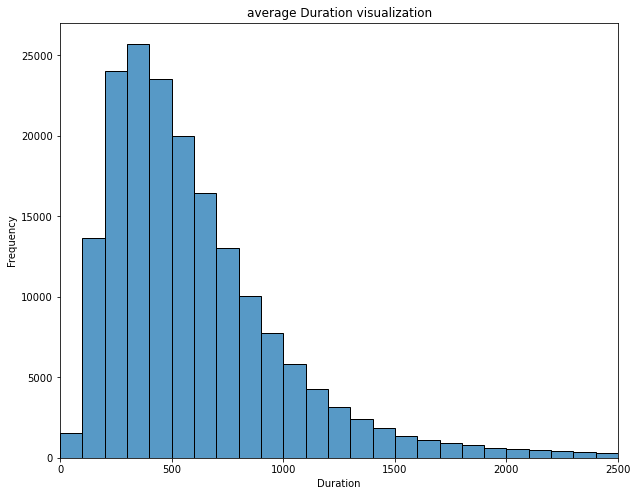

In [29]:
plt.figure(figsize=(10,8))
bins = np.arange(0, ford['duration_sec'].max() + 100, 100)
plt.xlim(0, 2500)
sns.histplot(ford, x='duration_sec', bins=bins)
plt.title('average Duration visualization')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

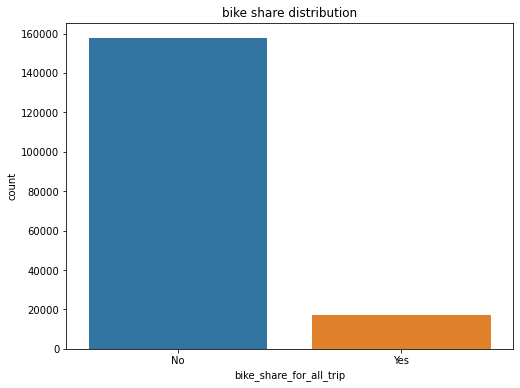

In [9]:
plt.figure(figsize=(8,6))
plt.title('bike share distribution')
sns.countplot(data=ford, x='bike_share_for_all_trip')
plt.show()

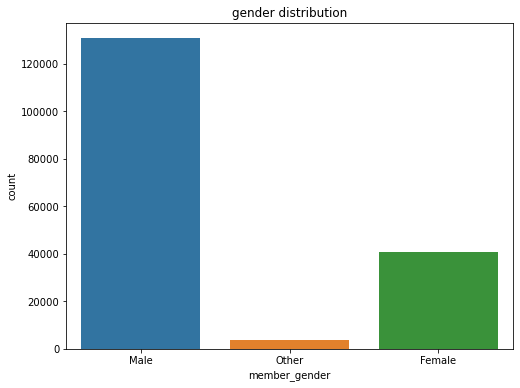

In [8]:
plt.figure(figsize=(8,6))
plt.title('gender distribution')
sns.countplot(data=ford, x='member_gender')
plt.show()

# Bivariate section

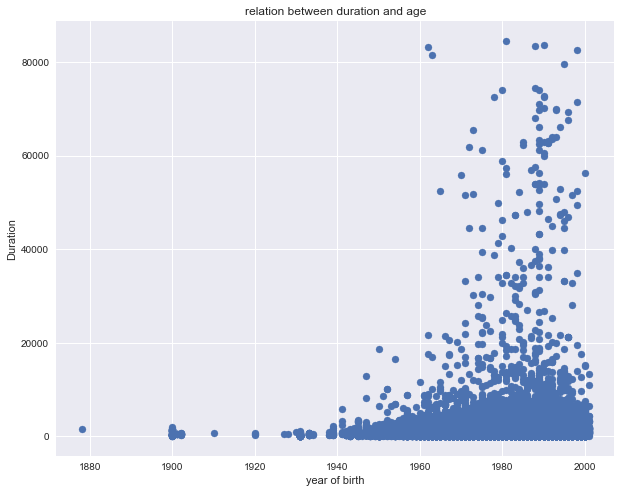

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(data=ford, x='member_birth_year', y='duration_sec')
plt.title('relation between duration and age')
plt.ylabel('Duration')
plt.xlabel('year of birth')
plt.show()

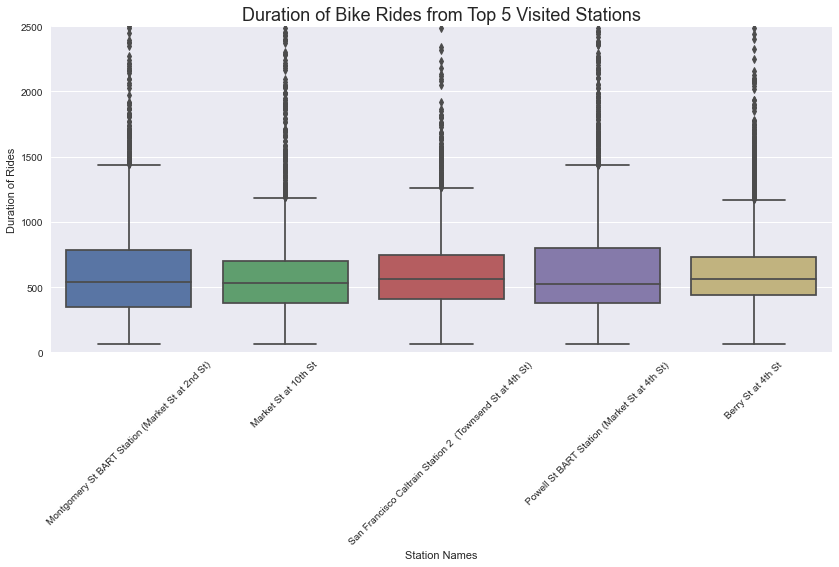

In [53]:
plt.figure(figsize = (14,6))
sns.boxplot(data = data_start, x = 'start_station_name', y = 'duration_sec');
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

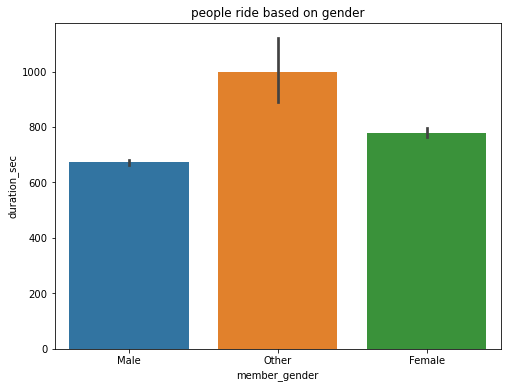

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=ford, x='member_gender', y='duration_sec')
plt.title('people ride based on gender')
plt.show()

# Multivariante section

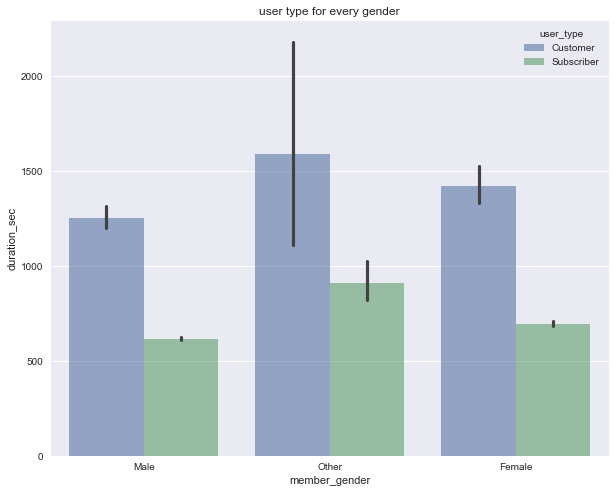

In [37]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="member_gender",y='duration_sec', data=ford,
                   hue="user_type", alpha=0.6)
plt.title('user type for every gender')
plt.show()

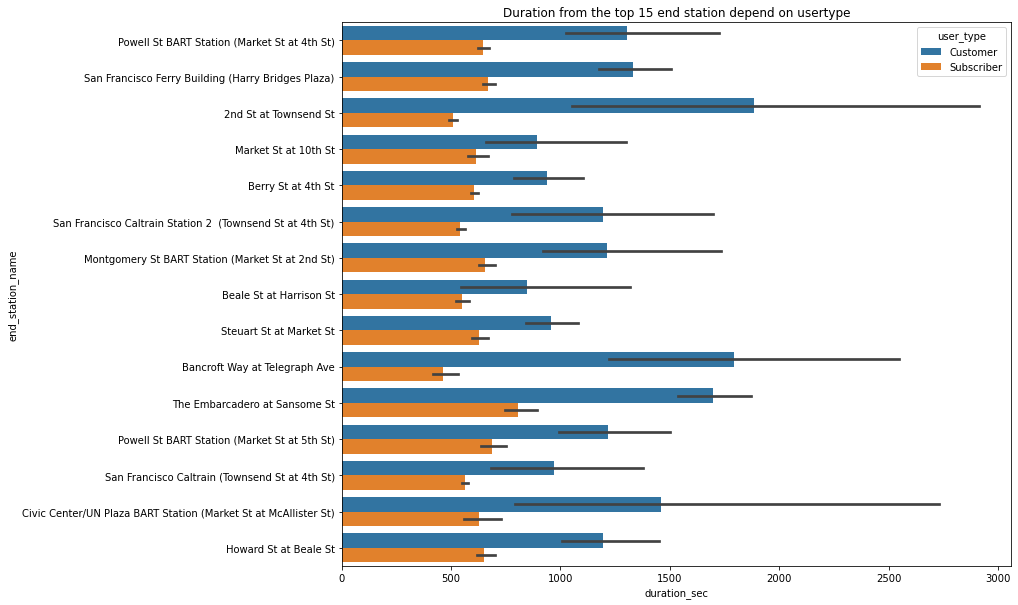

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(data=data_end, y='end_station_name', x='duration_sec', hue='user_type')
plt.title("Duration from the top 15 end station depend on usertype")
plt.show()

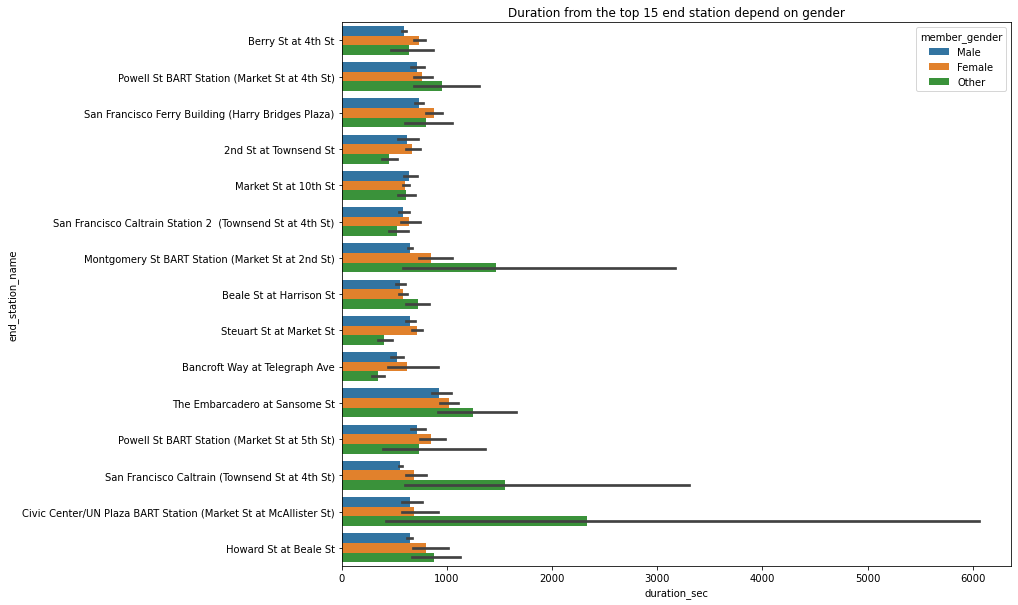

In [7]:
plt.figure(figsize=(12,10))
sns.barplot(data=data_end, y='end_station_name', x='duration_sec', hue='member_gender')
plt.title("Duration from the top 15 end station depend on gender")
plt.show()

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt